<a href="https://colab.research.google.com/github/LeandroCoelhos/estudos_datascience/blob/main/Regress%C3%A3o_Linear/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#OPCIONAL: ajusta o html do jupter centralizando os outputs de imagens nas células

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import HTML
HTML(""" 
<style>
.output_png {
  display: table-cell;
  text-align: center;
  vertical-align: middle;
}
</style>
    
""")


In [ ]:
X = np.array([2,6,8,8,12,16,20,20,22,26]).reshape(-1,1)
Y = np.array([58,105,88,118,117,137,157,169,149,202])

Vamos contruir uma hipótese que relacione Y com X linearmente, da forma Y = ax + b

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X, Y)

LinearRegression()

Mostrando os coeficientes encontrados pela regressão

In [ ]:
print(lr.coef_)
print(lr.intercept_)

print( f'\nModelo: y = {lr.coef_[0]} x + {lr.intercept_}')

[5.]
60.0

Modelo: y = 5.0 x + 60.0


Mostrando diferença do real e do predito pelo nosso modelo

In [ ]:
df = pd.DataFrame(X, columns =['Variavel Explicativa'])
df['Real'] = Y
df['Previsto'] = lr.predict(X)
df

,Variavel Explicativa,Real,Previsto
0,2,58,70.0
1,6,105,90.0
2,8,88,100.0
3,8,118,100.0
4,12,117,120.0
5,16,137,140.0
6,20,157,160.0
7,20,169,160.0
8,22,149,170.0
9,26,202,190.0


No gráfico abaixo, conseguimos vizualizar os pontos do nosso conjunto de dados e a reta que melhor relaciona os pontos.

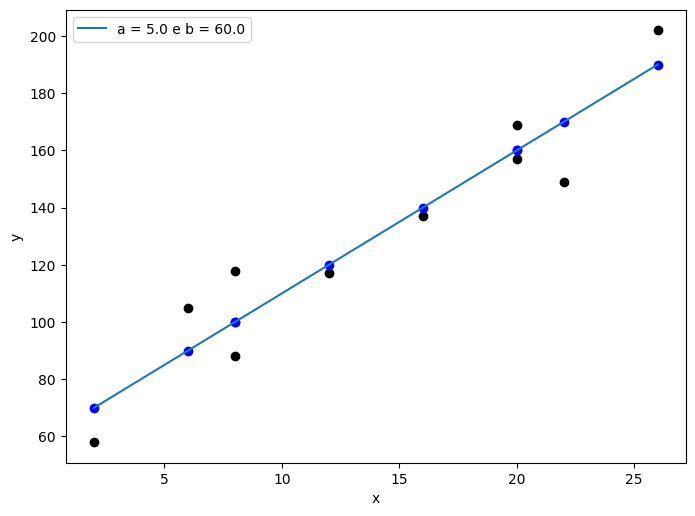

In [ ]:
plt.figure(figsize=(8,6), dpi=100)

x = np.arange(min(X), max(X)+1, 1).reshape(-1,1)
plt.plot(x, lr.predict(x), label = 'a = '+str(lr.coef_[0])+' e b = '+str(lr.intercept_))

plt.scatter(X, Y, c='k')
plt.scatter(X,lr.predict(X), color = 'blue')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Exemplo com mais variáveis explicativas

In [ ]:
from sklearn.datasets import make_regression
#Criar conjunto de dados de uma regressão ficticia
X_big, Y_big_real = make_regression(n_samples=200, n_features=10, n_informative=5, noise=30, tail_strength=0.3, random_state=42)

In [ ]:
lr_big = LinearRegression()
lr_big.fit(X_big, Y_big_real)

LinearRegression()

In [ ]:
print('Coeficientes: ', lr_big.intercept_, lr_big.coef_)

Coeficientes:  -3.442161118856454 [ 1.53504458 -1.59908847  7.68307896 80.58345008  1.65002134 36.45262863
  9.99969291 41.01975588  1.56709946 -1.20620528]


In [ ]:
Y_big_previsto = lr_big.predict(X_big)
df_big = pd.DataFrame(list(X_big), columns=['Variável '+str(i) for i in range(len(X_big[0]))])
df_big['Real'] = Y_big_real
df_big['Previsto'] = Y_big_previsto
df_big

,Variável 0,Variável 1,Variável 2,Variável 3,Variável 4,Variável 5,Variável 6,Variável 7,Variável 8,Variável 9,Real,Previsto
0,1.262584,0.932591,-0.399636,0.224685,-1.760809,1.726964,-0.372833,0.722381,-1.525656,-1.418366,81.047593,97.310775
1,-0.295480,-0.370011,-0.109610,-0.088363,1.598647,-0.436386,0.006422,0.546284,0.560919,-0.258796,3.413128,-0.872555
2,-0.692421,-1.320023,0.194607,-0.742471,-0.037037,-0.622649,1.695051,0.043602,-0.429302,-0.611769,-123.438372,-64.684488
3,-1.406661,-0.725744,0.026091,0.517659,-0.755383,-0.624819,-1.279577,-1.840874,-0.611518,0.186767,-76.199271,-76.039565
4,-2.872262,-1.594703,-0.147603,-0.466037,-0.532701,0.323168,-1.768439,0.140886,-1.169917,0.513600,8.419654,-47.446281
...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.410814,-1.662492,-1.748532,1.304340,1.126705,0.793489,0.810808,-0.134309,-1.090966,1.032546,100.862559,120.687064
196,-0.894607,-0.309172,-0.462275,-0.434496,-0.478749,0.096121,-0.516045,0.938284,1.255756,0.222134,-45.348515,-5.144183
197,-0.576904,0.150394,-0.525755,-0.759133,1.876171,-2.123896,-0.599393,-0.839722,0.950424,0.341756,-214.088367,-183.468780
198,-0.974529,-0.241258,1.109700,0.409819,1.899882,0.634721,0.489187,0.350630,-0.132634,0.672574,85.198420,81.525680


#Métricas

Queremos formas de identificar se um modelo de regressão está bom ou ruim. Essas métricas são independentes do estilo de modelo utilizado, por isso vamos voltar com a nomeclatura

$$(x_1,\cdots,x_n). $$

Novamente, com um conjunto de dados

$$ S = \{ (x_{1,1}, x_{1,2}, \cdots, x_{1,n}, y_1), (x_{2,1}, x_{2,2}, \cdots, x_{2,n}, y_2), \cdots, (x_{N,1}, x_{N,2}, \cdots x_{N,n},y_N) \} ,$$

dizemos que o **erro quadrático médio** ou **mean squared error (MSE)** de um regressor $h$ no conjunto de dados $S$ é dado por 

$$ \textrm{MSE}(h,S) = \frac{1}{N} \sum{1=1}^N \left( h(x_{i,1}, x_{i,2}, \cdots, x_{i,n}) - y_i \right)^2 = \frac{1}{N} \sum_{i=1}^N \left( \widehat{y}_i - y_i \right)^2 ,$$

em que $\widehat{y}_i = h(x_{i,1}, x_{i,2}, \cdots, x_{i,n})$ é a previsão do regressor $h$ para o exemplo $i$ do conjunto de dados $S$.

Essa era a métrica que estávamos otimizando no mínimos quadrados (a menos de um fator constante)!

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
mean_squared_error(Y_big_real, Y_big_previsto)

763.2123045705787

Um problema que surge é: se $y$ tem uma unidade, por exemplo _reais_, o que significa estar errando em méria _763 reais²_? 
perdemos um pouco a interpretação do nosso erro, nos motivando a criar a a**raiz do erro quadrático médio** ou **root mean sqared error (RMSE)** de um regressor $h$ no conjunto de dados $S$ como

$$ \textrm{RMSE}(h,S) = \sqrt{\textrm{MSE}(h,S) } = \sqrt{ \frac{1}{N} \sum_{i=1}^N \left( \widehat{y}_i - y_i \right)^2 } .$$

No `sklearn` podemos simplesmente tirar a raíz da métrica com as ferramentas do `numpy`:

In [ ]:
np.sqrt(mean_squared_error(Y_big_real, Y_big_previsto))

27.626297337330218

Beleza, então temos um RMSE tal. Isso é bom, ruim? Depende muito das propriedades do conjunto de dados e principalmente da escala da target.

Sugestão: comparar com um benchmark.

**Pergunta*: Qual o bencjmark simples para a regressão? Reformulando: Se eu não pudesse usar nenhum dos atributos e quisesse prever o target, como poderia fazer isso? Se eu quisesse chutar uma constante para os nosso exemplos, qual a meldor contante que podemos usar?

A média $\bar{y}$ de média dos $y_i$ é uma opção muito boa! Na verdade, a média é a melhor opção constante se queremos minimizar o erro quadrático médio!

<p><details>
  <summary><b>Demontração.</b></summary>
<p>O erro MSE de uma hipótese $h(x_1,\cdots, x_n) = \alpha$ constante é dado por 

$$ \textrm{MSE}(\alpha,S) = \frac{1}{N} \sum_{i=1}^N \left(\alpha - y_i\right)^2  .$$

Derivando em relação a $\alpha$, temos

$$ \frac{\partial}{\partial \alpha} \textrm{MSE} (\alpha, S) = \frac{2}{N} \sum_{i=1}^N \left(\alpha - y_i\right) = 0 \implies \implies \alpha = \frac{1}{N} \sum_{i=1}^N y_i = \bar{y} .$$

</p>
</details></p>


Comparamos então $\textrm{MSE}(h,S)$ com $ \textrm{MSE}\left(\bar{y}, S\right)$ definindo a métrica **R²**:

$$ R^2 (h,S) = 1 - \frac{\textrm{MSE}(h,S)}{\textrm{MSE}(\bar{y}, S)} = 1 - \frac{\sum_{i=1}^N \left( \widehat{y}_i - y_i \right)^2}{\sum_{i=1}^N \left(\bar{y} - y_i\right)^2} .$$

Se o modelo $h$ é bem melhor que a hipótese da média. Então a fração dos erros quadráticos deve ser próxima de $0$ e portanto o R² próximo de $1$.

Agora, se o modelo é tão bom quanto a média, sem diminuir o MSE, temos R² próximo de 0. No pior dos casos, se o $h$ tem um erro MSE maior que o erro da média, ficamos com um R² negativo!

No `sklearn` fazemos apenas:

In [ ]:
r2_score(Y_big_real, Y_big_previsto)

0.9229757493547153

In [ ]:
#maneira de calcular na mão
1 - mean_squared_error(Y_big_real, Y_big_previsto)/mean_squared_error(Y_big_real, [np.mean(Y_big_real)]*Y_big_real.shape[0])

0.9229757493547153

# ***obs: Vale a pena reparar que otimizar o MSE é equivalente a otimizar o R² ou otimizar o RMSE!***

Uma outra forma de medira qualidade de um modelo de regressão é com o **erro absoluto médio** ou **mean absolute error (MAE)** de um regressor $h$ no conjunto de dados $S$ é dado por

$$ \textrm{MAE}(h,S) = \frac{1}{N} \sum_{i=1}^N \left| h(x_i^1, x_i^2, \cdots, x_i^n) - y_i \right | = \frac{1}{N} \sum_{i=1}^N \left| \widehat{y}_i - y_i \right| .$$

O erro absoluto médio nos da uma noção de quanto estamos errando (em valor absoluto) em média. É bem mais intuitiva, mas menos utilizada pois a função módulo |.| não é diferenciavél em 0.

Para medir tal erro no `sklearn` fazemos:

In [ ]:
mean_absolute_error(Y_big_real, Y_big_previsto)

21.874317340785474

Se a gente quisesse fazer um R² análogo, a gente poderia. Temos que achar a melhor contante que minimiza $\textrm{MSE}(\alpha,S)$ e depois subistituir.

In [ ]:
1 - mean_absolute_error(Y_big_real, Y_big_previsto)/mean_absolute_error(Y_big_real, [np.median(Y_big_real)]*Y_big_real.shape[0])

0.7266765354040082

Existem ainda outras formas de métricas de regressão. Podemos, por exemplo, colocar pesos na frente de exemplos importantes que queremos penalizar por error, ou fazer erros relativos, dividindo pelo valor da target e olhando o erro nessa proporção.

# Regressão Polinomial

Não temos mais a suposição que nossos dados sigam uma relação linear. Tomamos agora uma relação polinomial que explique nossos dados.

A escolha do Grau do polinomio é arbitrária, mas durante a regularização vamos ver formas de contornar este problema de escolha do grau do polinomio.

In [ ]:
X = pd.DataFrame([-6,-7.5,-4,-2.3,-2.5,-1,0,0.5,2,3.45,6.3,5,7.6,9.5,-8.9,-9.5,-8,-3.5,3.4,5.6], columns=['x'])
y = [528.9, -182.8, 337.5, 396.3, 414.8, 394.7, 725.9, 362.2, 505.8, 486.6, 128.2, 481.3, 1328.3, 2218.9, -872.8, -1151.1, 
     -591.2, 601.6, 651.8, 1361.6]

In [ ]:
X.head()

,x
0,-6.0
1,-7.5
2,-4.0
3,-2.3
4,-2.5


In [ ]:
y[:5]

[528.9, -182.8, 337.5, 396.3, 414.8]

In [ ]:
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

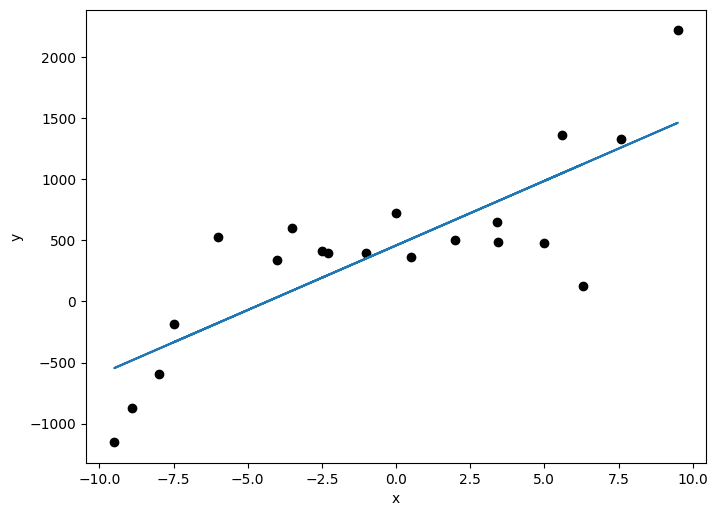

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(X, y_pred)
plt.scatter(X.x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Como o algoritimo sempre tenta encontrar relações lineares entre as variáveis, ele não consegue capturar o padrão mais complexo deste caso específico.

Para contornarmos este problema, podemos criar novas features, de modo que a relação ente a nossa variável resposta Y, e as novas features criadas sejam aproximadamente linear. Em geral, um método comum para geração de novas features é aumentar o grau do polinômio, ou seja, utilizar os valores de x², x³ .... como features novas.

Para este exemplo vamos crias as novas features x² e x³ e tentar aplicar novamente o algoritimo. Para diferenciar os casos, vamos chamar as features do novo caso de z. Teremos então 3 features

$$ z_1 = x $$

$$z_2 = x²$$
$$z_3 = x³$$

E o algoritimo tentará encontrar o hiperplano

$$y = a_0 + a_1z_1 + a_2z_2 + a_3z_3$$

Note que em relação a z o algoritimo está resolvendo um problema de regressão linear comum.

In [ ]:
Z = pd.DataFrame()
Z['z1'] = X.x
Z['z2'] = X.x**2
Z['z3'] = X.x**3
Z.head()

,z1,z2,z3
0,-6.0,36.00,-216.000
1,-7.5,56.25,-421.875
2,-4.0,16.00,-64.000
3,-2.3,5.29,-12.167
4,-2.5,6.25,-15.625


In [ ]:
lr = LinearRegression()
lr.fit(Z, y)
y_pred = lr.predict(Z)

#Gerando o desenho da curva
X_graf = np.linspace(-10,10,num=100)
Z = pd.DataFrame()
Z['z1'] = X_graf
Z['z2'] = X_graf**2
Z['z3'] = X_graf**3
y_graf = lr.predict(Z)

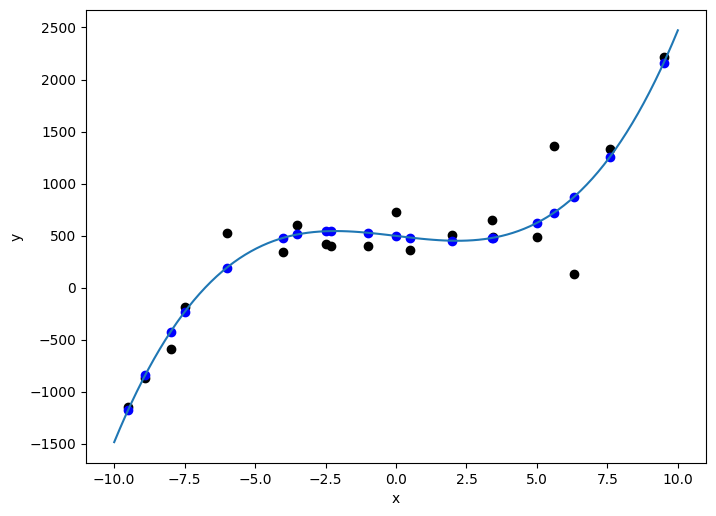

In [ ]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(X_graf, y_graf)
plt.scatter(X.x, y, color='black')
plt.scatter(X.x, y_pred, color = 'blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Vamos fazer isso de uma forma automatizada pelo Sciklear

In [ ]:
#fazer isso para gerar o agraficos 

Podemos ver que aumentar o grau do polinômio permite que o algoritimo aprenda um padrão nos dados com um polinômio de grau 3.


Mas o que acontece se continuarmos a aumentar o grau do polinômio? Abaixo está um exemplo do resultado encontrado ao se aplicar a regressão a polinômios de grau 10 e 15.

Podemos ver que ao aumentar muito o grau do polinômio a predição do algorítimo se torna muito sensível aos dados de entrada. Apesar disso, permitir que o algorítimo consiga um erro pequeno nos dados de treino provavelmente não irá generalizar bem pois está se ajustando ao ruído dos dados. Quando isso acontece, dizermos que aconteceu um overfitting.

Para vizualizar o impacto desses fenômenos na generalização, vamos gerar novos dados a aprtir da função real do exemplo acima e ver o desempenho do modelo neste caso.

In [ ]:
x_test =np.array([-6,-7.5,-4,-2.3,-2.5,-1,0,0.5,2,3.45,6.3,5,7.6,9.5,-8.9,-9.5,-8,-3.5,3.4,5.6])
y_test = [528.9, -182.8, 337.5, 396.3, 414.8, 394.7, 725.9, 362.2, 505.8, 486.6, 128.2, 481.3, 1328.3, 2218.9, -872.8, -1151.1, 
     -591.2, 601.6, 651.8, 1361.6]

In [ ]:
#Gerar features polinomiais
def gen_pol(X, n):
  X_pol = np.zeros((X.shape[0], n))
  for i in range(n):
    X_pol[:,i] = X**(i+1)
  return(X_pol)

Z = gen_pol(X.x, 10)
Z_test = gen_pol(x_test, 10) 

In [ ]:
#Linear
lr = LinearRegression()
lr.fit(Z[:,0].reshape(-1,1), y)
y_pred = lr.predict(Z_test[:,0].reshape(-1,1))

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))


MSE:  185023.4097595035
MAE:  351.6901063174573
R2:  0.6565283620758233


In [ ]:
# Grau 3
lr = LinearRegression()
lr.fit(Z[:,:3], y)
y_pred = lr.predict(Z_test[:,:3])

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  65776.07611967418
MAE:  173.94590312791803
R2:  0.8778953612928464


In [ ]:
#Grau 10
lr = LinearRegression()
lr.fit(Z, y)
y_pred = lr.predict(Z_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  44563.93177979018
MAE:  136.41240521016567
R2:  0.9172729188125903


# Regularização



Como vimos anteriormente é importante controlar a capacidade do modelo para previnir o overfitting e manter seu poder de generalização. A regularização é o nome dado a técnicas que tem como objetivo diminuir esta capacapacidade.

No contexto de Regressão Linear as formas mais comuns de regularização são as chamadas de Ridge (L1), Lasso (L2) e ElasticNet.

Para entender seu funciomento, vamos relembrar a função custo da regressão linear

$$ E(\textbf{a}) = \sum_{i=1}^{N} \left(h_{\textbf{a}}(\textbf{x}_i) - y_i \right)^2 + \alpha\sum_{j=1}^{n}(a_j)^2 = || \textbf{X}\textbf{a} - \textbf{y}||^2_2 + \alpha||\textbf{a}||^2_2  $$

A ideia principal é que diminuir o valor dos coeficientes diminui a influencia de algumas variáveis no modelo e assim nosso modelo se torna mais simples. No exemplo aparesentado do polinômio de décimo grau, diminuir os coeficientes pode diminuir a influência dos termos de maior grau e assim tornar nossa função mais proxima do caso mais adequado. Em resumo, ao penalizar os coeficientes estamos reduzindo a capacidade do nosso modelo de se adaptar aos dados. Assim reduzimos a variância9 e aumentamos o viés), e controlamos o overfitting.

Na utilização do Ridge, é impportante notar o valor do termo $zalpha$ que multiplica a soma dos parâmetros. Ao alterar o valor deste parâmetro, conseguimos controlar o quanto queremos que o algoritimo penalize o modelo. Outro detalhe importante é que ao utilizar variáveis com escalas diferentes podemos acabar induzindo valores maiores ou menores nos coeficientes do modelo. Por isso temos que normalizar as variáveis ao utilizar regularização.

Vamos ver o efeito da utilização do Ridge no exemplo polinomial.

# Ridge

In [43]:
X = pd.DataFrame([-6,-7.5,-4,-2.3,-2.5,-1,0,0.5,2,3.45,6.3,5,7.6,9.5,-8.9,-9.5,-8,-3.5,3.4,5.6], columns=['x'])
y = [528.9, -182.8, 337.5, 396.3, 414.8, 394.7, 725.9, 362.2, 505.8, 486.6, 128.2, 481.3, 1328.3, 2218.9, -872.8, -1151.1, 
     -591.2, 601.6, 651.8, 1361.6]
#faltam dados

X_test = np.array([-6.5,-7.6,-4.4,-2.2,-2.1,-0.5,-0.4,1.2,1.6,4,5.7,4.8,7.9,10.2,-8.8,-9.2])
y_test = [294.3,-74.2,295.8,159.5,688.1,525.2,508.2,499.7,648.7,874,715,394.2,1660.5,2788.1,-1198.6,-1385.3]

In [46]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=10, include_bias=False)

Z = pf.fit_transform(X)
Z_test = pf.transform(X_test.reshape(-1,1))

In [50]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
Z_esc = sc.fit_transform(Z)
Z_esc_test = sc.transform(Z_test)

In [51]:
lr = LinearRegression()
lr.fit(Z_esc, y)
y_pred = lr.predict(Z_esc_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  12027197.98607052
MAE:  1060.1654390887184
R2:  -12.960871786426607


In [52]:
print((lr.coef_**2).sum())
lr.coef_

250272719382.14227


array([  -1563.83545813,   -4773.89810306,   33407.25230557,
         56784.8931557 , -160012.47483269, -199702.38798023,
        271746.51530816,  268798.12068191, -140198.34821743,
       -121110.29735801])

In [54]:
from sklearn.linear_model import Ridge

rg = Ridge(alpha=10)
rg.fit(Z_esc, y)
y_pred = rg.predict(Z_esc_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  507930.47008748783
MAE:  453.6018179450182
R2:  0.4104069644880265


In [57]:
print((rg.coef_**2).sum())
rg.coef_

192914.87239964464


array([239.12306605, -45.03593323, 205.50606927, -41.83787657,
       184.32297454, -31.32340428, 169.7866677 , -20.52090809,
       159.36645612, -11.01098757])

# Lasso

Como mostrado anteriormente o Ridge penaliza os coeficientes colocando o termo $\alpha||\textbf{a}||^2_2$ na função custo por ser um termo quadrático  o impacto da penalização acaba sendo maior em coeficientes de maior valor e quase nulo em coeficientes próximos de zero. Por isso, o Ridge não costuma zerar os coeficientes do modelo. Para contornar este efeito, o Lasso altera a penalização para o termo $\alpha||\textbf{a}||_1$. Assim, a função de custo se torna:

$$ E(\textbf{a}) = \sum_{i=1}^{N} \left(h_{\textbf{a}}(\textbf{x}_i) - y_i \right)^2 + \alpha\sum_{j=1}^{n}(|a_j|) = ||\textbf{X}\textbf{a} - \textbf{y}||^2_2 + \alpha||\textbf{a}||_1 $$

Essa alteração permite que o Lasso exclua completamente algumas variáveis do modelo. Isso é bem útil quando não temos certeza se todas as variáveis que temos são de fato uteis.

In [58]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=20)
ls.fit(Z_esc, y)
y_pred = ls.predict(Z_esc_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  95796.96072927683
MAE:  242.29882406801306
R2:  0.8888012745928254


In [59]:
print(np.abs(ls.coef_).sum())
ls.coef_

2820.6469438814647


array([   0.        ,   -0.        , 2267.68428393,   -0.        ,
        552.96265995,   -0.        ,    0.        ,   -0.        ,
          0.        ,   -0.        ])

# Elastic Net

O Elastic Net é utilizado para combinar os efeitos do Ridge e Lasso. Nele utilizamos um parâmetro adicional para indicar o quanto do efeito da penalização se deve o Ridge e o quanto se deve ao Lasso. A sua função de custo é:

$$E(\textbf{a}) = || \textbf{X}\textbf{a} - \textbf{y}||^2_2 + \rho\alpha||\textbf{a}||_1 + (1-\rho)\alpha||\textbf{a}||^2_2 $$

In [60]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha=0.001, l1_ratio=0.3)
en.fit(Z_esc, y)
y_pred = en.predict(Z_esc_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  69784.58743524973
MAE:  214.0830556529295
R2:  0.9189957894614734


In [ ]:
#Imagem comparando regularização e sem regularização

Para selecionar os melhores hiperparâmetros, vamos avaliar o desempenho do algoritimo em uma base de validação

In [61]:
rg = Ridge(alpha=1)
rg.fit(Z_esc, y)
y_pred = rg.predict(Z_esc_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  107633.59115169829
MAE:  239.65820777254427
R2:  0.8750616088866378


In [62]:
rg = Ridge(alpha=10)
rg.fit(Z_esc, y)
y_pred = rg.predict(Z_esc_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  507930.47008748783
MAE:  453.6018179450182
R2:  0.4104069644880265


In [63]:
rg = Ridge(alpha=20)
rg.fit(Z_esc, y)
y_pred = rg.predict(Z_esc_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('MAE: ', mean_absolute_error(y_test, y_pred))
print('R2: ', r2_score(y_test, y_pred))

MSE:  646903.3533786811
MAE:  513.3948741685924
R2:  0.24909070382070986


# Considerações Finais

# Requisitos
* **Linearidade**: Existe uma relação linear entre as variáveis explicativas ( ou as variáveis explicativas tranformadas) e a variável resposta.
* **Erros independentes**: os resíduos são independentes para cada amostra e respeitam uma distribuição normal com média 0 e ***variância contrante*** (homoscedasticidade).
* **Sem multicolinearidade**: Não existe relação linear perfeita entre as variáveis explicativas.

# Vantagens
* **Simplicade e Interpretabilidade**: Modelos lineares são relativamente simples de entender, de usar e apresenntam fácil interpretabilidade, ou seja, é facil identificar quais são as variáveis que mais influenciam o resultado final.
* **Seleção de variáveis**: Se nossas variáveis estão **normalizadas**, podemos entender as variáveis mais importantes olhando o valor absoluto dos coeficientes. Podemos usar isso para realizar a seleção de variáveis (feature selection), principalmente aliado á regularização Lasso.

# Desvantagens
* Dificilmente consegue capturar relações mais complexas entre as variáveis. Criar variáveis novas nem sempre é imediato e fácil de observar.
* Os requisitos do modelo raramente são atendidos.
* O modelo é facilmente afetado por outliers.